# LINEAR REGRESSION- SALES DATA

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import shapiro,kstest,normaltest
import statsmodels.api as sm

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

# PROBLEM STATEMENT :-

# DATA GATHERING :-

In [2]:
df = pd.read_csv("Sales_data.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# 8523 rows × 12 columns

# EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING :-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.isna().sum()   # Item_Weight--> 1463  Outlet_Size--> 2410   having NAN values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.select_dtypes(include=['object']).info() # need to convert all features in numerical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           6113 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

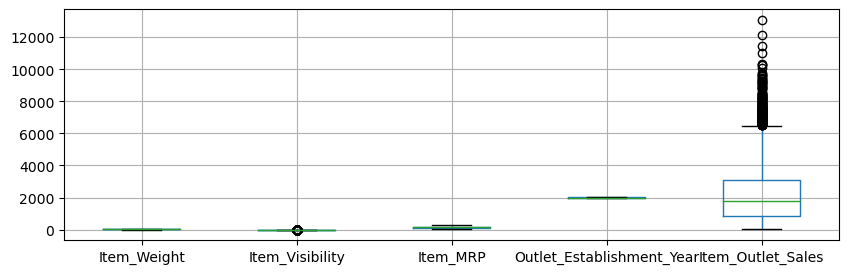

In [9]:
plt.figure(figsize=(10,3))
df.boxplot()

In [10]:
# df.info()

## 1.Item_Identifier  

In [11]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [12]:
df['Item_Identifier'].nunique() # as 1559 unique values are thr....one hot encoding or labelled encoding not usefull here

1559

In [13]:
# Take a decision to drop this column as this feature is not directly take participate to predict sales of items
df.drop("Item_Identifier",axis=1,inplace=True)

In [14]:
#  df.info()

# 2.Item_Weight

In [15]:
df['Item_Weight'].nunique()


415

In [16]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [17]:
df['Item_Weight'].isna().sum()   # 1463 missing values

1463

In [18]:
df['Item_Weight'].mean()

12.857645184136183

In [19]:
df['Item_Weight'].median()

12.6

In [20]:
# Feature Engg
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [21]:
df['Item_Weight'].isna().sum() 

0

<AxesSubplot:xlabel='Item_Weight'>

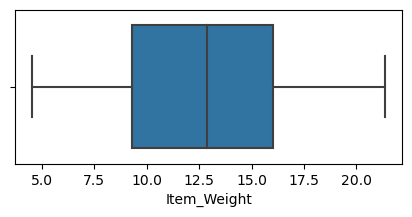

In [22]:
# check for outlires

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Item_Weight']) # no outlires are presnt

In [23]:
# df.info()

# 3.Item_Fat_Content

In [24]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [25]:
df['Item_Fat_Content'].unique()  # # no NAN value

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
df['Item_Fat_Content'].value_counts().to_dict()     

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [27]:
# Low Fat = LF = low fat        Regular = reg 

# labelled encoding required

df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0},
                               inplace=True)
# df['Item_Fat_Content']

In [28]:
item_Fat_Content_select = {'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0}

In [29]:
# df.info()

# 4.Item_Visibility 

In [30]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [31]:
df['Item_Visibility'].nunique() # as 7880 unique values present

7880

In [32]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [33]:
df['Item_Visibility'].isna().sum()

0

<AxesSubplot:xlabel='Item_Visibility'>

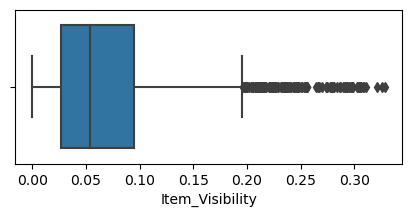

In [34]:
# outliers

plt.figure(figsize=(5,2))
sns.boxplot(x = df['Item_Visibility'])

In [35]:
# by using irq method--detect outliers

q1 = df['Item_Visibility'].quantile(0.25)
q2 = df['Item_Visibility'].quantile(0.50)
q3 = df['Item_Visibility'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr


print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 0.195979015
lower_tail : -0.07440424500000001


In [36]:
df[['Item_Visibility']].loc[df['Item_Visibility'] > upper_tail]  # outlires beyound upper_tail

,Item_Visibility
49,0.255395
83,0.293418
108,0.278974
174,0.291865
334,0.204700
...,...
8292,0.209163
8345,0.266397
8371,0.214125
8432,0.227261


In [37]:
# df[['Item_Visibility']].loc[df['Item_Visibility'] < lower_tail]

In [38]:
# df['Item_Visibility'].loc[(df['Item_Visibility'] <= upper_tail).median()] 

In [39]:
df.loc[(df['Item_Visibility'] > upper_tail), 'Item_Visibility'] = upper_tail  

In [40]:
df[['Item_Visibility']].loc[df['Item_Visibility'] > upper_tail]  # check

,Item_Visibility


<AxesSubplot:xlabel='Item_Visibility'>

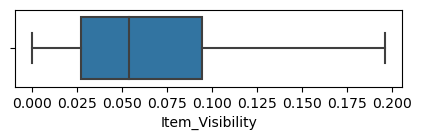

In [41]:
plt.figure(figsize=(5,1))
sns.boxplot(x = df['Item_Visibility']) # again check

In [42]:
# df.info()


## 5.Item_Type  

In [43]:
df['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [44]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [45]:
df['Item_Type'].nunique()  # 16 unique values

16

In [46]:
# df['Item_Type'].value_counts()

In [47]:
df['Item_Type'].isna().sum()

0

In [48]:
# Feature Engg---one hot encoding---as 16 non-ordinal values are thr

df = pd.get_dummies(df,columns=['Item_Type'])
# df

## 6.Item_MRP

In [49]:
df['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [50]:
df['Item_MRP'].nunique()  # 5938 unique values

5938

In [51]:
df['Item_MRP'].isna().sum()

0

In [52]:
# df.describe()

<AxesSubplot:xlabel='Item_MRP'>

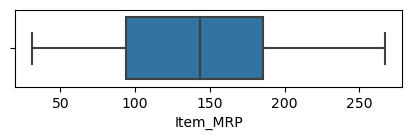

In [53]:
# check for outlires

plt.figure(figsize=(5,1))
sns.boxplot(x = df['Item_MRP'])   # no outlires present

In [54]:
# df.info()

## 7.Outlet_Identifier

In [55]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [56]:
df['Outlet_Identifier'].nunique()   # 10 unique value

10

In [57]:
df['Outlet_Identifier'].isna().sum()  # no nan values

0

In [58]:
# Feature Engg---> one hot encoding

df = pd.get_dummies(df,columns=['Outlet_Identifier'])
# df

In [59]:
# df.info()

## 8.Outlet_Establishment_Year

In [60]:
df['Outlet_Establishment_Year']  # different yrs

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [166]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [167]:
df['Outlet_Establishment_Year'].nunique()   # 9 unique value

9

In [63]:
df['Outlet_Establishment_Year'].isna().sum()

0

In [168]:
df['Outlet_Establishment_Year'].value_counts().to_dict()

{1985: 1463,
 1987: 932,
 1999: 930,
 1997: 930,
 2004: 930,
 2002: 929,
 2009: 928,
 2007: 926,
 1998: 555}

In [65]:
# df['Outlet_Establishment_Year']

In [66]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(object) # 1st convert into object

In [67]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=object)

In [68]:
# df['Outlet_Establishment_Year'].value_counts().to_dict()


In [69]:
# now repalce that years with (current year - that year)

In [70]:
df['Outlet_Establishment_Year'].replace({'1985': 38,
'1987': 36,
'1999': 24,
 '1997': 26,
'2004': 19,
 '2002': 21,
 '2009': 14,
 '2007': 16,
 '1998': 25},inplace=True)

In [71]:
outlet_Establishment_Year_select = {'1985': 38,
'1987': 36,
'1999': 24,
 '1997': 26,
'2004': 19,
 '2002': 21,
 '2009': 14,
 '2007': 16,
 '1998': 25}

In [72]:
# df.info()

## 9.Outlet_Size 

In [73]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [74]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [75]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [76]:
df['Outlet_Size'].isna().sum()   

2410

In [77]:
# Feature Engg--->replace NAN value 

df['Outlet_Size'].mode()[0]

'Medium'

In [78]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [79]:
# no needed labelled encoding-->

df['Outlet_Size'].replace({'Medium': 1, 'Small': 0, 'High': 2},inplace=True)

In [80]:
outlet_Size_select = {'Medium': 1, 'Small': 0, 'High': 2}

In [81]:
# df['Outlet_Size']

In [82]:
# df.info()

## 10.Outlet_Location_Type 

In [83]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [84]:
df['Outlet_Location_Type'].isna().sum()

0

In [85]:
df['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [86]:
# Feature Engg--encoding

df['Outlet_Location_Type'].replace({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1},inplace=True)

In [87]:
outlet_Location_Type_select = {'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1}

In [88]:
# df.info()

## 11.Outlet_Type 

In [89]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [90]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [91]:
df['Outlet_Type'].isna().sum()

0

In [92]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [93]:
# Feature Engg--->one hot encoding

df = pd.get_dummies(df,columns=['Outlet_Type'])
# df

In [94]:
# df.info()

## 12.Item_Outlet_Sales

In [95]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [96]:
df['Item_Outlet_Sales'].isna().sum()  # no NAN values

0

<AxesSubplot:xlabel='Item_Outlet_Sales'>

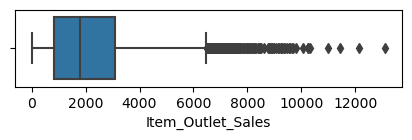

In [97]:
plt.figure(figsize=(5,1))
sns.boxplot(x = df['Item_Outlet_Sales']) 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

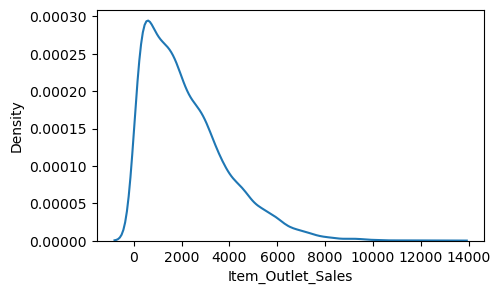

In [98]:
plt.figure(figsize=(5,3))
sns.kdeplot(df['Item_Outlet_Sales'])  # +vely skwed

In [99]:
# by using irq method--detect outliers

q1 = df['Item_Outlet_Sales'].quantile(0.25)
q2 = df['Item_Outlet_Sales'].quantile(0.50)
q3 = df['Item_Outlet_Sales'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr


print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 6501.8699
lower_tail : -2566.3261


In [100]:
df[['Item_Outlet_Sales']].loc[df['Item_Outlet_Sales'] > upper_tail]    # 186 otlirs are present

,Item_Outlet_Sales
43,6768.5228
130,7968.2944
132,6976.2524
145,7370.4060
203,6704.6060
...,...
8245,7549.5062
8329,6630.0364
8350,7240.5750
8447,7588.1226


In [101]:
df['Item_Outlet_Sales'].max()

13086.9648

In [102]:
df['Item_Outlet_Sales'].min()

33.29

In [103]:
df.select_dtypes(include=['object']).info()   # all column are numerical-->dataset is ready to use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Empty DataFrame

In [104]:
df     # 8523 rows × 38 columns

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,1,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,1,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,1,3,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,2,3,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2,3,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,1,2,549.2850,1,0,...,0,0,0,1,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,0,2,1193.1136,0,0,...,0,0,1,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,3,1845.5976,0,0,...,0,0,0,0,0,0,0,0,1,0


# FEATURE SELECTION

## 1. LINIARITY

In [105]:
check = df.corr()
check[['Item_Outlet_Sales']].sort_values('Item_Outlet_Sales').head(20)

,Item_Outlet_Sales
Outlet_Type_Grocery Store,-0.411727
Outlet_Identifier_OUT010,-0.284883
Outlet_Identifier_OUT019,-0.277250
Item_Visibility,-0.117918
Outlet_Establishment_Year,-0.049135
Item_Type_Baking Goods,-0.038381
Outlet_Identifier_OUT018,-0.038059
Outlet_Type_Supermarket Type2,-0.038059
Item_Type_Health and Hygiene,-0.025587
Item_Type_Soft Drinks,-0.024040


In [106]:
check[['Item_Outlet_Sales']].sort_values('Item_Outlet_Sales').tail(19)

,Item_Outlet_Sales
Item_Type_Dairy,0.008858
Item_Weight,0.011550
Item_Type_Starchy Foods,0.015039
Item_Type_Household,0.015701
Item_Fat_Content,0.018719
Outlet_Identifier_OUT046,0.019803
Item_Type_Snack Foods,0.022782
Outlet_Identifier_OUT013,0.024170
Item_Type_Fruits and Vegetables,0.025950
Outlet_Identifier_OUT017,0.032610


<AxesSubplot:>

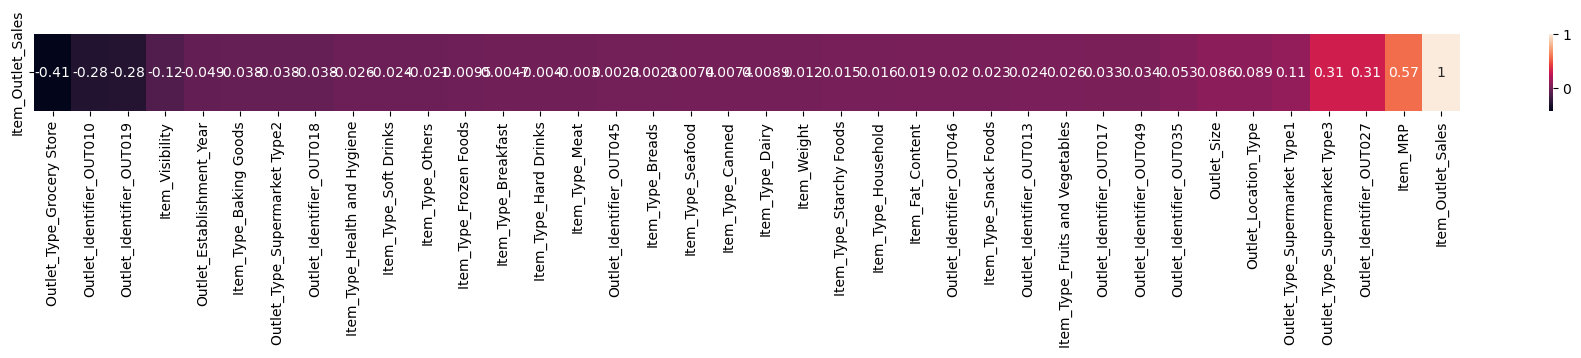

In [107]:
Outlate_items_linearty = df.drop('Item_Outlet_Sales', axis= 1)   
Outlate_items_column  = df['Item_Outlet_Sales']
Outlate_items_linearty.insert(37,'Item_Outlet_Sales',Outlate_items_column,allow_duplicates=True)  
Outlate_items_linearty

corr_with_Outlate_items = Outlate_items_linearty.corr().tail(1).sort_values('Item_Outlet_Sales', axis=1) # linearity with dependent variable
plt.figure(figsize=(23,1))
sns.heatmap(corr_with_Outlate_items, annot= True)

## 2.NO MULTICOLINEARITY:

<AxesSubplot:>

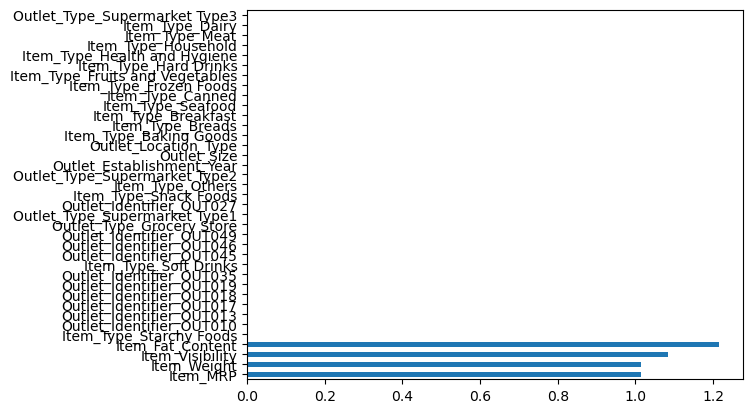

In [108]:
df1 = df.drop('Item_Outlet_Sales', axis=1)

vif_list = []
for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1,i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df1.columns)
# s1
s1.sort_values().plot(kind = "barh")

# MODEL BUILDING:-

In [109]:
x = df.drop('Item_Outlet_Sales', axis=1)     
y = df['Item_Outlet_Sales']  

In [110]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=9)

In [111]:
model = LinearRegression()    

model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

## On Training Data

In [112]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Accuracy :",Training_Accuracy_r2)

MSE : 1262126.6698272373
RMSE : 1123.4441106825195
MAE : 827.3780058700146
Training Accuracy : 0.5666770655079655


In [113]:
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Accuracy  :",Testing_Accuracy_r2 )

MSE : 1298121.5697360022
RMSE : 1139.3513811533307
MAE : 861.6233709451512
Testing Accuracy  : 0.5537852852306817


## Normality of Residual

### 1. kdeplot

In [114]:
Residual = y_train - y_pred_train
# Residual


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

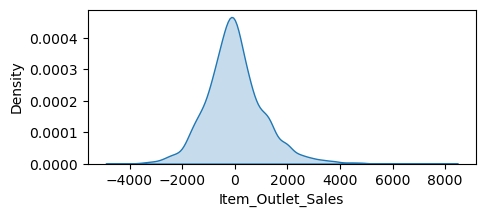

In [115]:
plt.figure(figsize=(5,2))
sns.kdeplot(Residual, fill=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

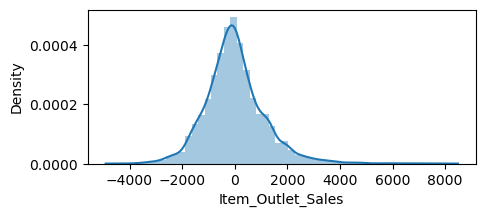

In [116]:
plt.figure(figsize=(5,2))
sns.distplot(Residual)

## 2.Hypothesis Testing

In [117]:
# shapiro Test

_ , p_val = shapiro(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected ")
    print("Data is NOT Normally Distributed")

P_Value: 2.252681816359663e-35
Null Hypothesis is Rejected 
Data is NOT Normally Distributed


In [118]:
# ks Test

_ , p_val = kstest(Residual, 'norm')

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.0
Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


In [119]:
# normaltest

_ , p_val = normaltest(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Which suggest that Data is Normally Distributed")
    
else:
    print("Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 4.355875180997988e-174
Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


## QQ Plot

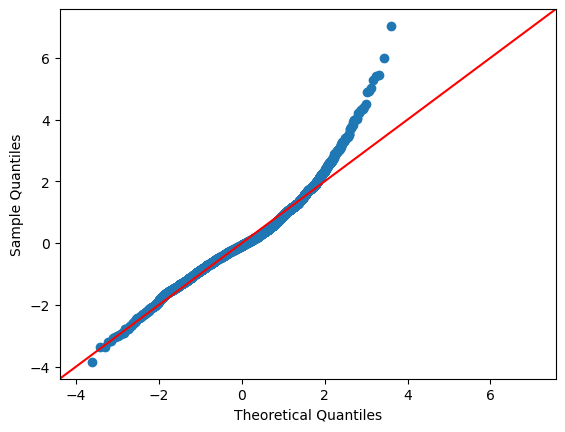

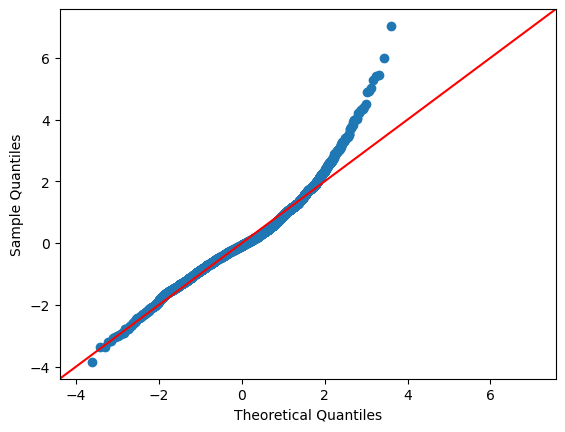

In [120]:
sm.qqplot(Residual, line = '45', fit=True) 

## Homoscedasticity

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>

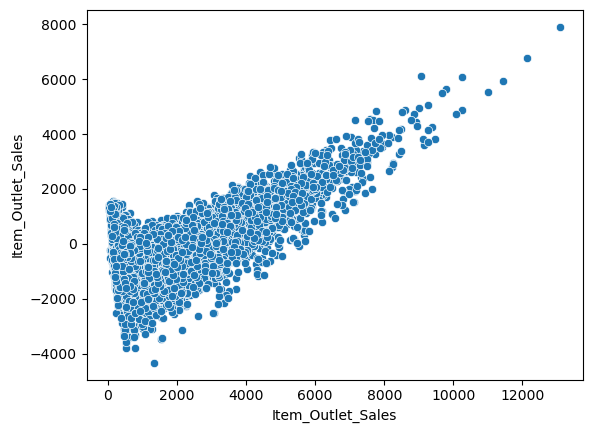

In [121]:
sns.scatterplot(x = y_train, y= Residual)

# Ridge Regression Model

In [122]:
ridge_reg_model = Ridge(alpha= 1.0)
ridge_reg_model.fit(x_train, y_train)

Ridge()

<AxesSubplot:>

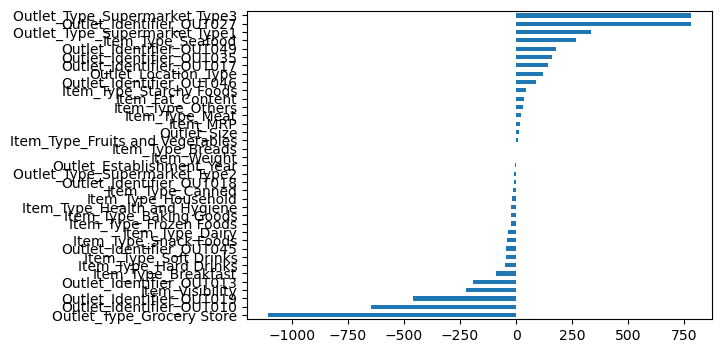

In [123]:
s2 = pd.Series(ridge_reg_model.coef_, index=x.columns)
plt.figure(figsize=(6,4))
s2.sort_values().plot(kind = "barh")

# Model evaluation 

###  Training Data

In [124]:
y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge Accuracy :", Training_Ridge_Accuracy_r2)

MSE : 1262127.704512245
RMSE : 1123.4445711793016
MAE : 827.3580904003617
Training Ridge Accuracy : 0.5666767102720335


## Testing Data

In [125]:
y_pred_test = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing RidgeAccuracy :", Testing_Ridge_Accuracy_r2)

MSE : 1298056.0226608862
RMSE : 1139.3226157067568
MAE : 861.5588364728897
Testing RidgeAccuracy : 0.5538078163018145


# Lasso Regression Model

In [126]:
lasso_reg_model = Lasso(alpha= 1.0) 
lasso_reg_model.fit(x_train, y_train)

Lasso()

# Model evaluation

### Training Data

In [127]:
y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Accuracy :", Training_Lasso_Accuracy_r2)

MSE : 1262748.4190674676
RMSE : 1123.7207923089559
MAE : 827.5451516444277
Training Lasso Accuracy : 0.5664636018265968


### Testing Data

In [128]:
y_pred_test = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Accuracy :", Testing_Lasso_Accuracy_r2)

MSE : 1296619.8896997552
RMSE : 1138.6921839108913
MAE : 860.9922060991258
Testing Lasso Accuracy : 0.5543014708828351


# Hyperparameter Tunning

## Ridge Regression

### 1.GridSearchCv

In [129]:
ridge_model = Ridge() 

param_grid = {"alpha": np.arange(0.01,3,0.01)}  

gscv_ridge_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_ridge_model.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [130]:
gscv_ridge_model.best_estimator_ 

Ridge(alpha=2.9899999999999998)

In [131]:
ridge_reg_model = Ridge(alpha= 2.9899999999999998)
ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=2.9899999999999998)

# Model evaluation

### Training Data

In [132]:
y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Grid_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge GridSerchCv Accuracy :", Training_Ridge_Grid_Accuracy_r2)

MSE : 1262135.0323488996
RMSE : 1123.4478324999784
MAE : 827.317806250782
Training Ridge GridSerchCv Accuracy : 0.56667419442338


### Testing Data

In [133]:
y_pred_test = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Grid_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Ridge GridSearchCv Accuracy :", Testing_Ridge_Grid_Accuracy_r2)

MSE : 1297928.0666564282
RMSE : 1139.2664599014702
MAE : 861.435651521312
Testing Ridge GridSearchCv Accuracy : 0.5538517997417045


## 2.RandomizedSearchCV

In [134]:
ridge_model = Ridge()   # Model instance

param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_ridge_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [135]:
rscv_ridge_model.best_estimator_ 

Ridge(alpha=2.8699999999999997)

In [136]:
ridge_reg_model = Ridge(alpha= 2.9)  

ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=2.9)

# Model evaluation

### Training Data

In [137]:
y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Ridge_Random_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Ridge Random Accuracy :", Training_Ridge_Random_Accuracy_r2)

MSE : 1262134.568969552
RMSE : 1123.447626269045
MAE : 827.3196547857477
Training Ridge Random Accuracy : 0.5666743535143046


### Testing Data

In [138]:
y_pred_test = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Ridge_Random_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Ridge Random Accuracy :", Testing_Ridge_Random_Accuracy_r2)

MSE : 1297933.7689879541
RMSE : 1139.2689625316552
MAE : 861.441091011444
Testing Ridge Random Accuracy : 0.5538498396292661


# Lasso Regression

## 1.GridSearchCv

In [139]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model, param_grid, n_jobs=-1)

gscv_lasso_model.fit(x_train, y_train)  

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [140]:
gscv_lasso_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [141]:
lasso_reg_model = Lasso(alpha= 2.9899999999999998)  
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.9899999999999998)

# Model evaluation

### Training Data

In [142]:
y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Grid_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Grid Accuracy :", Training_Lasso_Grid_Accuracy_r2)

MSE : 1264004.8310775456
RMSE : 1124.279694327682
MAE : 827.2503807761611
Training Lasso Grid Accuracy : 0.5660322408925849


### Testing Data

In [143]:
y_pred_test = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Grid_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Grid Accuracy :", Testing_Lasso_Grid_Accuracy_r2)

MSE : 1296968.1745680657
RMSE : 1138.8451056083377
MAE : 860.513517372222
Testing Lasso Grid Accuracy : 0.5541817518697667


## 2.RandomizedSearchCV

In [144]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model, param_grid, n_jobs=-1)

rscv_lasso_model.fit(x_train, y_train)

RandomizedSearchCV(estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [145]:
rscv_lasso_model.best_estimator_

Lasso(alpha=2.73)

In [146]:
lasso_reg_model = Lasso(alpha= 2.76)  
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.76)

# Model evaluation

### Training Data

In [147]:
y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

Training_Lasso_Random_Accuracy_r2 = r2_score(y_train, y_pred_train)
print("Training Lasso Random Accuracy :", Training_Lasso_Random_Accuracy_r2)

MSE : 1263891.9800700126
RMSE : 1124.2295050700336
MAE : 827.3015423064844
Training Lasso Random Accuracy : 0.5660709857594146


## Testing Data

In [148]:
y_pred_test = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

Testing_Lasso_Random_Accuracy_r2 = r2_score(y_test, y_pred_test)
print("Testing Lasso Random Accuracy :", Testing_Lasso_Random_Accuracy_r2)

MSE : 1296847.049821444
RMSE : 1138.7919256042537
MAE : 860.5119150046296
Testing Lasso Random Accuracy : 0.5542233871414742


## Testing for user input values

In [149]:
x.head(1).T 



,0
Item_Weight,9.300000
Item_Fat_Content,0.000000
Item_Visibility,0.016047
Item_MRP,249.809200
Outlet_Establishment_Year,1999.000000
Outlet_Size,1.000000
Outlet_Location_Type,1.000000
Item_Type_Baking Goods,0.000000
Item_Type_Breads,0.000000
Item_Type_Breakfast,0.000000


In [150]:
column_names = x.columns 
# column_names

In [151]:
# create picke file
import pickle

with open("linear_model_SALES_DATA.pkl", "wb") as f:
    pickle.dump(model, f)

In [152]:
# item_Fat_Content_select 
# outlet_Establishment_Year_select
# outlet_Size_select 
# outlet_Location_Type_select


In [153]:
# Saving the dictionaries and column names list in JSON format

data_save_json = {"item_Fat_Content_select" : item_Fat_Content_select,
                       "outlet_Establishment_Year_select" : outlet_Establishment_Year_select,
                            "outlet_Size_select " : outlet_Size_select,      # space add ahe so be care full
                                  "outlet_Location_Type_select" : outlet_Location_Type_select,
                                       "column_names" : list(column_names)}
data_save_json

{'item_Fat_Content_select': {'Low Fat': 0,
  'Regular': 1,
  'LF': 0,
  'reg': 1,
  'low fat': 0},
 'outlet_Establishment_Year_select': {'1985': 38,
  '1987': 36,
  '1999': 24,
  '1997': 26,
  '2004': 19,
  '2002': 21,
  '2009': 14,
  '2007': 16,
  '1998': 25},
 'outlet_Size_select ': {'Medium': 1, 'Small': 0, 'High': 2},
 'outlet_Location_Type_select': {'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1},
 'column_names': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Item_Type_Baking Goods',
  'Item_Type_Breads',
  'Item_Type_Breakfast',
  'Item_Type_Canned',
  'Item_Type_Dairy',
  'Item_Type_Frozen Foods',
  'Item_Type_Fruits and Vegetables',
  'Item_Type_Hard Drinks',
  'Item_Type_Health and Hygiene',
  'Item_Type_Household',
  'Item_Type_Meat',
  'Item_Type_Others',
  'Item_Type_Seafood',
  'Item_Type_Snack Foods',
  'Item_Type_Soft Drinks',
  'Item_Type_Starchy Foods',
  'Outlet_Identifier_O

In [154]:
# create jason file

import json

with open("PROJECT_SALES_DATA.json", "w") as f:
    json.dump(data_save_json, f)

# user entered values

In [155]:
Item_Weight = 9.3 
Item_Fat_Content = 'Regular'
Item_Visibility = 0.016047
Item_MRP = 249.80
Outlet_Establishment_Year = '1985'
Outlet_Size = "Medium"
Outlet_Location_Type = "Tier 2"

Item_Type = 'Snack Foods'
Outlet_Identifier = 'OUT049'
Outlet_Type = 'Supermarket Type2' 

In [156]:
array = np.zeros(len(x.columns), dtype = int)  
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [157]:

Item_Type_col = 'Item_Type_' + Item_Type
Outlet_Identifier_col = 'Outlet_Identifier_' + Outlet_Identifier
Outlet_Type_col = 'Outlet_Type_' + Outlet_Type
Outlet_Identifier_col

'Outlet_Identifier_OUT049'

In [158]:
Item_Type_index = np.where(column_names == Item_Type_col)[0][0]
Outlet_Identifier_index = np.where(column_names == Outlet_Identifier_col)[0][0]
Outlet_Type_index = np.where(column_names == Outlet_Type_col)[0][0]
Outlet_Type_index

35

In [159]:
# data_save_json["item_Fat_Content_select"][Item_Fat_Content]
# data_save_json["outlet_Establishment_Year_select"][Outlet_Establishment_Year]
data_save_json["outlet_Size_select "][Outlet_Size]  # space add ahe so be care full
# data_save_json["outlet_Location_Type_select"][Outlet_Location_Type]

1

In [160]:
array[0] = Item_Weight
array[1] = data_save_json["item_Fat_Content_select"][Item_Fat_Content]
array[2] = Item_Visibility
array[3] = Item_MRP 
array[4] = data_save_json["outlet_Establishment_Year_select"][Outlet_Establishment_Year]
array[5] = data_save_json["outlet_Size_select "][Outlet_Size]     # space add ahe so be care full
array[6] = data_save_json["outlet_Location_Type_select"][Outlet_Location_Type]

array[Item_Type_index] = 1 
array[Outlet_Identifier_index] = 1 
array[Outlet_Type_index] = 1
array

array([  9,   1,   0, 249,  38,   1,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0])

In [161]:
sales = model.predict([array])[0]
print("The TOTAL SALES of an ITEM in a givenby outlates or store would be :", int(sales),"item sales")

The TOTAL SALES of an ITEM in a givenby outlates or store would be : 16584 item sales


In [162]:

# data_save_json["outlet_Location_Type_select"][Outlet_Location_Type]
data_save_json["item_Fat_Content_select"][Item_Fat_Content]


1

In [163]:
data_save_json["outlet_Size_select "][Outlet_Size]


1

In [164]:
data_save_json["item_Fat_Content_select"][Item_Fat_Content]

1

In [165]:
data_save_json["outlet_Size_select "][Outlet_Size]

1